# Deri Kanseri Sınıflandırması

In [2]:
import cv2 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
labels=["Cancer","Non_Cancer"]
img_path="Skin_Data/"

In [4]:
img_list=[]
label_list=[]

for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [5]:
os.listdir("Skin_Data/")

['Cancer', 'Non_Cancer']

In [6]:
df=pd.DataFrame({"img":img_list,'label':label_list})

In [7]:
df.sample(8)

,img,label
269,Skin_Data/Non_Cancer/837-01.JPG,Non_Cancer
262,Skin_Data/Non_Cancer/782.JPG,Non_Cancer
229,Skin_Data/Non_Cancer/527-2.JPG,Non_Cancer
140,Skin_Data/Non_Cancer/1605-01.JPG,Non_Cancer
37,Skin_Data/Cancer/1969-1.JPG,Cancer
110,Skin_Data/Non_Cancer/1248-1.JPG,Non_Cancer
73,Skin_Data/Cancer/646.1.JPG,Cancer
153,Skin_Data/Non_Cancer/1810-01.JPG,Non_Cancer


In [8]:
df.shape

(288, 2)

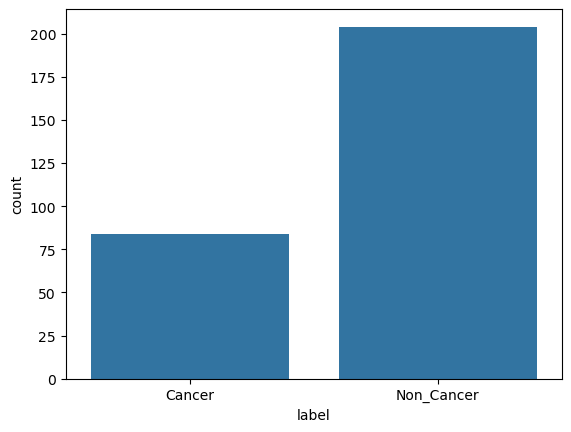

In [9]:
sns.countplot(x='label', data=df);

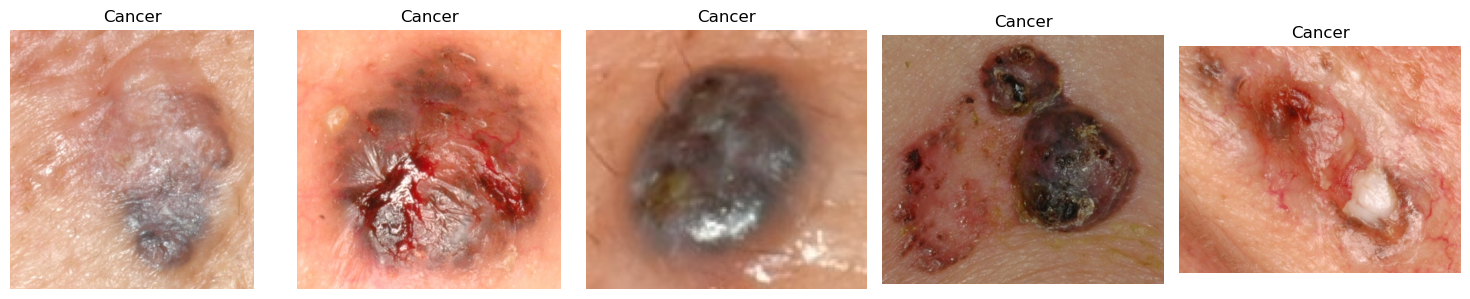

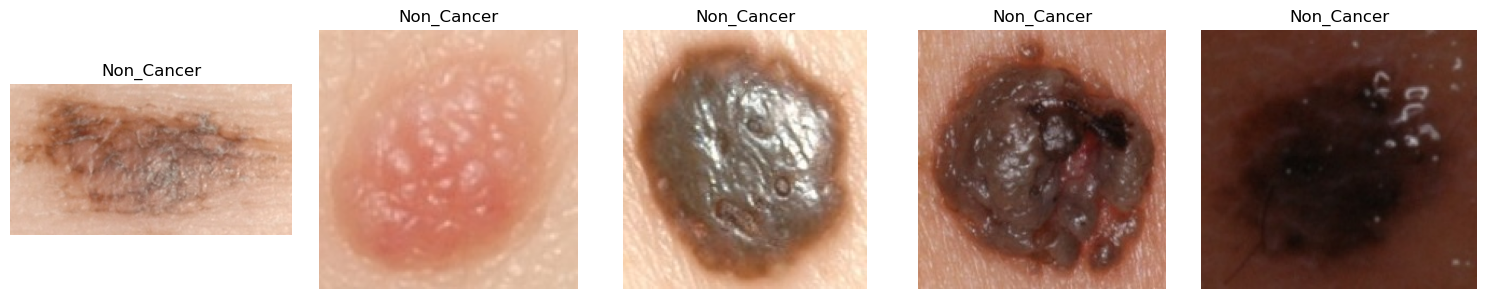

In [10]:
def show_samples(df, label, num=5):
    sample_df = df[df['label'] == label].sample(num)
    plt.figure(figsize=(15,3))
    for i, img_path in enumerate(sample_df['img']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num, i+1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_samples(df, 'Cancer', 5)
show_samples(df, 'Non_Cancer', 5)

In [11]:
d={"Cancer":1,"Non_Cancer":0}

In [12]:
df["encode_label"]=df["label"].map(d)

In [13]:
df.sample(6)

,img,label,encode_label
165,Skin_Data/Non_Cancer/1902-01.JPG,Non_Cancer,0
107,Skin_Data/Non_Cancer/1174-01.JPG,Non_Cancer,0
105,Skin_Data/Non_Cancer/1151-01.JPG,Non_Cancer,0
180,Skin_Data/Non_Cancer/2047-02.JPG,Non_Cancer,0
145,Skin_Data/Non_Cancer/1640-2.JPG,Non_Cancer,0
279,Skin_Data/Non_Cancer/911-2.JPG,Non_Cancer,0


In [14]:
import numpy as np

In [15]:
x=[]
for img in df["img"]:
    img=cv2.imread(img)
    img=cv2.resize(img,(170,170)) # boyutunu 170*170 yaptık
    img=img/255.0 #normalize
    img=np.array(img)
    x.append(img)

In [16]:
x=np.array(x)

In [17]:
y=df["encode_label"]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2, random_state=8, stratify=y)

In [19]:
# CNN Convolutional Neural Networks

In [20]:
# Data Augmentation - Veri Artırma
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2
)

train_gen = datagen.flow(x_train, y_train, shuffle=True)
test_gen = datagen.flow(x_test, y_test, shuffle=False)

In [21]:
model = Sequential()

model.add(InputLayer(shape=(170, 170, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(258, activation='relu'))
model.add(Dropout(0.3)) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3)) 


model.add(Dense(2, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

In [23]:
history=model.fit(train_gen, validation_data=test_gen, batch_size=8, epochs=100, callbacks=[early_stop], verbose=1)

C:\Users\OguzToy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5893 - loss: 1.7716 - val_accuracy: 0.2931 - val_loss: 0.7315
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6292 - loss: 0.6566 - val_accuracy: 0.7069 - val_loss: 0.6120
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.7088 - loss: 0.6529 - val_accuracy: 0.7069 - val_loss: 0.6137
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.6842 - loss: 0.6117 - val_accuracy: 0.7069 - val_loss: 0.5883
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6851 - loss: 0.5961 - val_accuracy: 0.7069 - val_loss: 0.6059
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6545 - loss: 0.5931 - val_accuracy: 0.7069 - val_loss: 0.5456
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6920 - loss: 0.5809 - val_accuracy: 0.7414 - val_loss: 0.5368
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6704 - loss: 0.5623 - val_accuracy: 0.7241 - val_loss: 0.5583


In [24]:
model.save("my_cnn_model.keras")

In [25]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_gen, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 556ms/step - accuracy: 0.8779 - loss: 0.3925
Test Loss: 0.3854
Test Accuracy: 0.8793


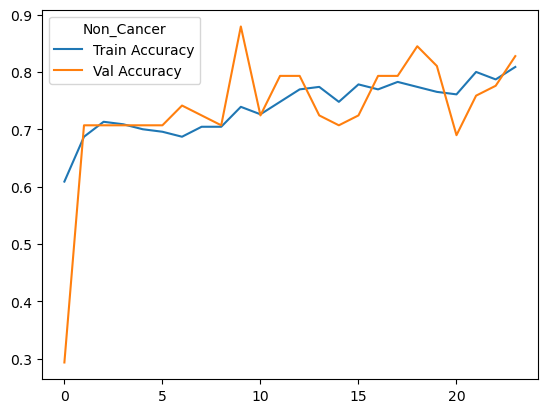

In [26]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend(title=label)

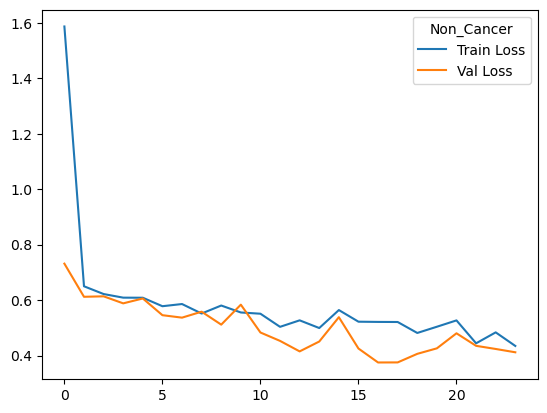

In [27]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(title=label)

In [28]:
y_pred = np.argmax(model.predict(test_gen), axis=1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


array([[38,  3],
       [ 3, 14]], dtype=int64)

<Axes: >

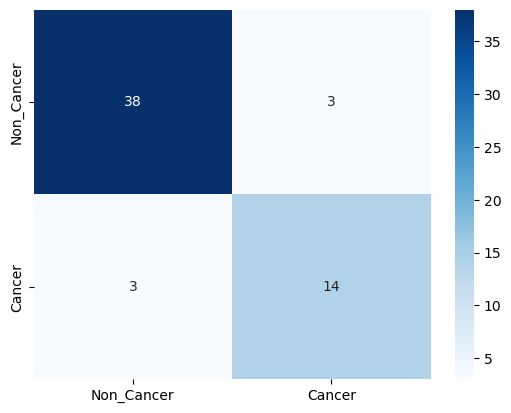

In [29]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non_Cancer", "Cancer"], yticklabels=["Non_Cancer", "Cancer"])

In [30]:
print(classification_report(y_test, y_pred, target_names=["Non_Cancer", "Cancer"]))

              precision    recall  f1-score   support

  Non_Cancer       0.93      0.93      0.93        41
      Cancer       0.82      0.82      0.82        17

    accuracy                           0.90        58
   macro avg       0.88      0.88      0.88        58
weighted avg       0.90      0.90      0.90        58

